In [1]:
from learningAgent import LearningAlgorithm
from environment import Model
from Qtable import QTable
from policyTable import PolicyTable
from test import Test
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.random.seed(0)

In [3]:
# Parameters for the game:
total_demand = 400
agent_cost = 57
adversary_cost = 71 
costs = [agent_cost,adversary_cost]
total_stages = 25

In [4]:
# Parameters for the adversary:
number_actions = 50
number_demands = total_demand + 1

In [5]:
# Create adversary and the game:
adversary = PolicyTable(number_demands,number_actions,adversary_cost,total_stages)
adversary_1 = adversary.random_reset()
adversary_2 = adversary.random_reset()
adversary_probabilities = [0.5, 0.5]
adversaries = [adversary_1, adversary_2]
game = Model(total_demand, costs, total_stages, adversaries, adversary_probabilities)

In [6]:
# Create agent:
# Learning rate is given as [numerator,denominator] which gives us a learning rate function of 
# numerator/(n+denominator)
number_episodes = 5_000_000
constant = int(number_episodes/49)
discount_factor = 1
Qtable = QTable(number_demands, number_actions, total_stages , learning_rate = [constant,constant])

In [7]:
algorithm = LearningAlgorithm(game, Qtable, number_episodes, discount_factor)

In [8]:
opponent_results = [list() for adversary in adversaries]

In [9]:
# Action are only chosen according to an epsilon greedy strategy.
episode_counter = 0
number_episodes_per_round = 50_000
number_rounds = int(number_episodes / number_episodes_per_round)

for round_ in range(number_rounds): 
    print('Round ', round_, ' of ', number_rounds)
    algorithm.epsilon_greedy_learning(number_episodes_per_round, episode_counter, number_episodes)   
    for index, adversary in enumerate(adversaries):
        if adversary_probabilities[index] > 0:
            new_adversary_probabilities =[0]*len(adversaries)
            new_adversary_probabilities[index] = 1
            result = Test(game, Qtable, discount_factor, new_adversary_probabilities, adversaries)
            payoff, _, _, _, _ = result.total_payoff()
            opponent_results[index].append(payoff)
            print('Current payoff against adversary ', index, ":" , payoff)
    
    episode_counter += number_episodes_per_round


Round  0  of  100
Best payoff:  145226
Best actions:  [84, 122, 91, 103, 135, 112, 91, 114, 107, 106, 118, 135, 92, 99, 110, 113, 105, 112, 120, 87, 127, 89, 118, 132, 118]
Current payoff against adversary  0 : 112120.0
Current payoff against adversary  1 : 128231.0
Round  1  of  100
Best payoff:  141743
Best actions:  [87, 129, 124, 100, 120, 106, 98, 109, 127, 109, 102, 112, 115, 108, 123, 101, 102, 111, 103, 122, 99, 134, 99, 127, 99]
Current payoff against adversary  0 : 116361.0
Current payoff against adversary  1 : 117819.0
Round  2  of  100
Best payoff:  141249
Best actions:  [92, 122, 90, 109, 115, 133, 94, 100, 110, 102, 102, 113, 107, 107, 102, 139, 136, 114, 124, 104, 95, 136, 111, 117, 94]
Current payoff against adversary  0 : 122529.0
Current payoff against adversary  1 : 119880.0
Round  3  of  100
Best payoff:  144192
Best actions:  [92, 111, 96, 126, 95, 108, 105, 99, 119, 108, 112, 96, 109, 105, 115, 132, 103, 130, 105, 102, 122, 94, 98, 100, 134]
Current payoff against

Best payoff:  147541
Best actions:  [92, 94, 97, 118, 109, 143, 114, 130, 101, 124, 111, 122, 109, 94, 121, 82, 105, 106, 119, 103, 124, 120, 101, 104, 143]
Current payoff against adversary  0 : 127617.0
Current payoff against adversary  1 : 140949.0
Round  32  of  100
Best payoff:  150443
Best actions:  [92, 94, 101, 110, 142, 120, 101, 120, 100, 107, 117, 123, 120, 100, 98, 101, 94, 100, 108, 101, 122, 97, 118, 126, 125]
Current payoff against adversary  0 : 123537.0
Current payoff against adversary  1 : 144612.0
Round  33  of  100
Best payoff:  146738
Best actions:  [92, 94, 101, 109, 112, 118, 139, 98, 99, 100, 92, 113, 95, 108, 143, 101, 96, 127, 99, 124, 89, 123, 112, 119, 125]
Current payoff against adversary  0 : 126402.0
Current payoff against adversary  1 : 141804.0
Round  34  of  100
Best payoff:  147376
Best actions:  [92, 94, 101, 109, 112, 123, 114, 124, 100, 109, 103, 113, 124, 130, 82, 109, 135, 102, 135, 100, 90, 115, 105, 111, 118]
Current payoff against adversary  0 

Best payoff:  158964
Best actions:  [100, 84, 103, 100, 117, 107, 109, 119, 115, 109, 123, 109, 107, 113, 97, 109, 111, 139, 109, 118, 116, 114, 105, 124, 136]
Current payoff against adversary  0 : 131476.0
Current payoff against adversary  1 : 142221.0
Round  63  of  100
Best payoff:  154838
Best actions:  [100, 84, 103, 100, 117, 107, 109, 119, 109, 117, 129, 97, 105, 108, 115, 123, 96, 120, 101, 108, 107, 131, 120, 121, 136]
Current payoff against adversary  0 : 126546.0
Current payoff against adversary  1 : 143515.0
Round  64  of  100
Best payoff:  156436
Best actions:  [99, 84, 106, 98, 117, 107, 109, 119, 109, 117, 129, 97, 113, 108, 135, 102, 104, 116, 131, 101, 115, 98, 101, 120, 133]
Current payoff against adversary  0 : 128568.0
Current payoff against adversary  1 : 144307.0
Round  65  of  100
Best payoff:  157746
Best actions:  [100, 85, 103, 100, 117, 107, 109, 119, 116, 109, 111, 118, 110, 121, 111, 132, 94, 116, 102, 98, 107, 99, 117, 122, 141]
Current payoff against adve

Best payoff:  166662
Best actions:  [100, 91, 98, 99, 108, 113, 111, 105, 115, 124, 108, 118, 131, 104, 103, 107, 127, 106, 108, 104, 102, 122, 99, 125, 137]
Current payoff against adversary  0 : 102113.0
Current payoff against adversary  1 : 165470.0
Round  94  of  100
Best payoff:  166702
Best actions:  [100, 91, 98, 99, 107, 113, 111, 105, 115, 124, 108, 118, 121, 112, 103, 107, 113, 103, 132, 101, 133, 116, 122, 123, 142]
Current payoff against adversary  0 : 123557.0
Current payoff against adversary  1 : 164995.0
Round  95  of  100
Best payoff:  167404
Best actions:  [100, 91, 98, 98, 108, 113, 111, 105, 130, 105, 121, 118, 121, 112, 104, 107, 113, 116, 107, 113, 135, 108, 108, 128, 144]
Current payoff against adversary  0 : 117587.0
Current payoff against adversary  1 : 166919.0
Round  96  of  100
Best payoff:  167445
Best actions:  [100, 85, 103, 102, 105, 113, 111, 105, 130, 105, 120, 118, 121, 111, 103, 107, 113, 116, 108, 113, 135, 108, 112, 125, 144]
Current payoff against a

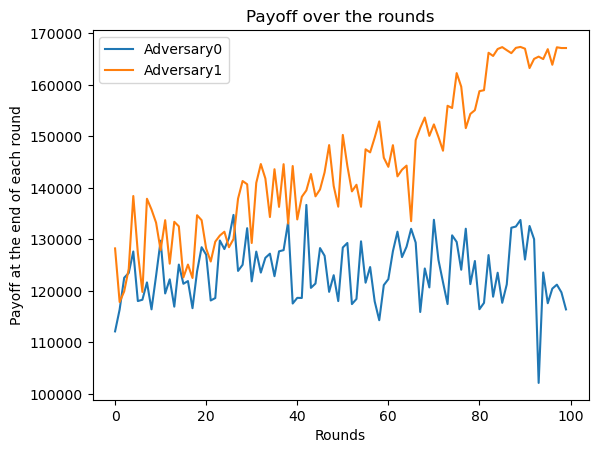

In [10]:
for index, adversary_probability in enumerate(adversary_probabilities):
        if adversary_probability > 0:
            plt.plot(opponent_results[index])
legend = list()
for index, adversary in enumerate(adversary_probabilities):
    if adversary_probabilities[index] > 0:
        name = "Adversary" + str(index)
        legend.append(name)
plt.title("Payoff over the rounds")
plt.xlabel("Rounds")
plt.ylabel("Payoff at the end of each round")
plt.legend(legend)

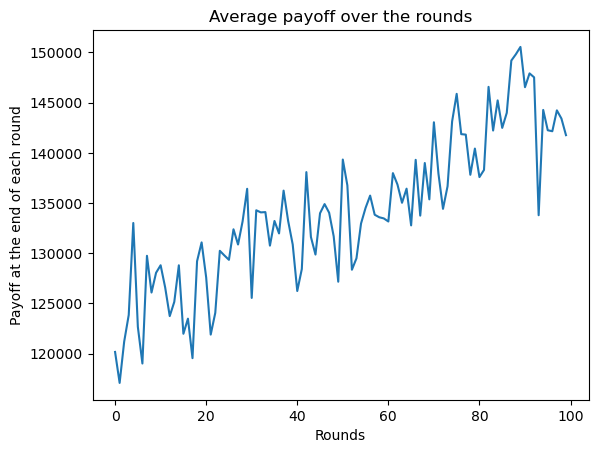

In [11]:
length = len(opponent_results[np.argmax(adversary_probabilities)])
average = [0] * length
for index, adversary_probability in enumerate(adversary_probabilities):
        if adversary_probability > 0:
            average += adversary_probability * np.array(opponent_results[index])
plt.title("Average payoff over the rounds")
plt.xlabel("Rounds")
plt.ylabel("Payoff at the end of each round")
plt.plot(average)